In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# we can find the encoding error with this, however it didnt tell what it requires here.
import chardet
with open('zomato.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1254',
 'confidence': 0.49068171335281274,
 'language': 'Turkish'}

In [4]:
# we got encoding from solution:  https://www.kaggle.com/paultimothymooney/how-to-resolve-a-unicodedecodeerror-for-a-csv-file
# UTF-8 is a multibyte encoding that can represent any Unicode character.
# ISO 8859-1 is a single-byte encoding that can represent the first 256 Unicode characters.
# Both encode ASCII exactly the same way
df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


# Zomato online DATA practice

In [49]:
## Plotting top 15 restaurant with maximum outlets

In [164]:
df['count']=1
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,count
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,1


In [166]:
df_new=df.groupby('Restaurant Name').sum().nlargest(15,'count')


In [171]:
lis=df_new['count']

In [175]:
lis

Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Barista             22
Dunkin' Donuts      22
Giani's             22
Costa Coffee        20
Pind Balluchi       20
Name: count, dtype: int64

In [30]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Count'],
      dtype='object')

In [31]:
df.drop(columns=['Longitude','Latitude','Locality Verbose','Is delivering now','Has Table booking','Has Online delivery','Locality','Address'],axis=1,inplace=True)
    
df.shape

(9551, 14)

In [49]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Cuisines,Average Cost for two,Currency,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"French, Japanese, Desserts",1100,Botswana Pula(P),No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,Japanese,1200,Botswana Pula(P),No,3,4.5,Dark Green,Excellent,591


## sol 4 city with lasrgest votes

In [52]:
df_city=df.groupby('City').sum()
print(df_city)
# ----------------OR---------------------------

# zomato['Restaurant Name'].value_counts().head(15)

In [54]:
df_citysort=df_city.sort_values(by='Votes')
print()
print("City with highest votes: \n",df_citysort.nlargest(1,'Votes'))


City with highest votes: 
            Restaurant ID  Country Code  Average Cost for two  Price range  \
City                                                                        
New Delhi    45290484692          5473               3262390         8875   

           Aggregate rating   Votes  
City                                 
New Delhi           13347.8  628340  


## Sol 3) restaurent with highest votes

In [56]:
df_restaurent=df.groupby('Restaurant Name').sum()
df_restaurent

,Restaurant ID,Country Code,Average Cost for two,Price range,Aggregate rating,Votes
Restaurant Name,,,,,,
Let's Burrrp,18490967,1,400,1,0.0,0
#45,3100446,1,600,2,3.6,209
#Dilliwaala6,18378803,1,800,3,3.7,124
#InstaFreeze,18311951,1,300,1,0.0,2
#OFF Campus,18336489,1,800,2,3.7,216
...,...,...,...,...,...,...
t Lounge by Dilmah,18361747,1,800,2,3.6,34
tashas,6401789,189,320,4,4.1,374
wagamama,7100938,148,70,4,3.7,131


In [59]:
df_rest_sum=df_restaurent.sort_values(by='Votes')
print()
print("Restaurant Name with highest votes", df_rest_sum.nlargest(1,'Votes'))


Restaurant Name with highest votes                  Restaurant ID  Country Code  Average Cost for two  \
Restaurant Name                                                      
Barbeque Nation       86563795           239                 38950   

                 Price range  Aggregate rating  Votes  
Restaurant Name                                        
Barbeque Nation           88             113.2  28142  


## sol 5) city with Excellent rating 

In [13]:
df.loc[:,'Count']=1

In [14]:
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Count
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,1


In [67]:
df['Rating text'].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [72]:
df_excell=df.loc[(df['Rating text']=='Excellent')]
#print(df.loc[(df['ReleaseYear'] == 2015)

In [74]:
df_excell

,Restaurant ID,Restaurant Name,Country Code,City,Cuisines,Average Cost for two,Currency,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Count
0,6317637,Le Petit Souffle,162,Makati City,"French, Japanese, Desserts",1100,Botswana Pula(P),No,3,4.8,Dark Green,Excellent,314,1
1,6304287,Izakaya Kikufuji,162,Makati City,Japanese,1200,Botswana Pula(P),No,3,4.5,Dark Green,Excellent,591,1
3,6318506,Ooma,162,Mandaluyong City,"Japanese, Sushi",1500,Botswana Pula(P),No,4,4.9,Dark Green,Excellent,365,1
4,6314302,Sambo Kojin,162,Mandaluyong City,"Japanese, Korean",1500,Botswana Pula(P),No,4,4.8,Dark Green,Excellent,229,1
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"European, Asian, Indian",6000,Botswana Pula(P),No,4,4.9,Dark Green,Excellent,621,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,5904116,J'adore Chocolatier,208,ÛÁstanbul,Desserts,50,Turkish Lira(TL),No,2,4.7,Dark Green,Excellent,1311,1
9538,5901782,Starbucks,208,ÛÁstanbul,Cafe,30,Turkish Lira(TL),No,2,4.9,Dark Green,Excellent,1042,1
9540,5927248,Draft Gastro Pub,208,ÛÁstanbul,Bar Food,130,Turkish Lira(TL),No,4,4.9,Dark Green,Excellent,522,1
9543,5916085,Dem Karakí_y,208,ÛÁstanbul,Cafe,35,Turkish Lira(TL),No,2,4.5,Dark Green,Excellent,761,1


In [79]:
df_excell_city=df_excell.groupby('City').sum()
print(df_excell_city)

                 Restaurant ID  Country Code  Average Cost for two  \
City                                                                 
Abu Dhabi             77557660          1498                  1760   
Agra                   3400346             1                     0   
Ahmedabad             36894776             3                  1600   
Ankara                30011289          1040                   330   
Athens                51879991           648                    60   
...                        ...           ...                   ...   
Tangerang              7417450            94                200000   
Vadodara               6400401             2                  1700   
Vizag                  5600869             2                  2200   
Wellington City       21302224           444                   145   
ÛÁstanbul             29564778          1040                   285   

                 Price range  Aggregate rating  Votes  Count  
City                      

In [81]:
df_excell_city_sort=df_excell_city.sort_values(by='Count')
print("City with excellent rating", df_excell_city_sort.nlargest(1,'Count'))

City with excellent rating            Restaurant ID  Country Code  Average Cost for two  Price range  \
City                                                                        
New Delhi      295614667            28                 39900           76   

           Aggregate rating  Votes  Count  
City                                       
New Delhi             129.3  25034     28  


## SOl 2) expensive cost restaurent

In [83]:
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Cuisines,Average Cost for two,Currency,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Count
0,6317637,Le Petit Souffle,162,Makati City,"French, Japanese, Desserts",1100,Botswana Pula(P),No,3,4.8,Dark Green,Excellent,314,1


In [85]:
df_sort_cost=df.sort_values(by ='Average Cost for two')

In [87]:
print(" expensive restaurent", df_sort_cost.nlargest(1,'Average Cost for two'))

 expensive restaurent       Restaurant ID           Restaurant Name  Country Code     City  \
9284        7410290  Satoo - Hotel Shangri-La            94  Jakarta   

                        Cuisines  Average Cost for two  \
9284  Asian, Indonesian, Western                800000   

                    Currency Switch to order menu  Price range  \
9284  Indonesian Rupiah(IDR)                   No            3   

      Aggregate rating Rating color Rating text  Votes  Count  
9284               4.6   Dark Green   Excellent    873      1  


## Cheap restaunent

In [3]:
df.groupby('City').sum()['Average Cost for two'].nlargest()
#or
print(" chespest restaurent", df_sort_cost.nsmallest(1,'Average Cost for two'))

SyntaxError: invalid syntax (<ipython-input-3-373e51f9c889>, line 2)

## visualization

In [8]:
pd.set_option('display.max_columns',30)
pd.options.display.max_columns

30

In [10]:
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


## Question 1) Restaurants delivering online or not

Text(0.5, 1.0, 'Restaurents delivering Online or not')

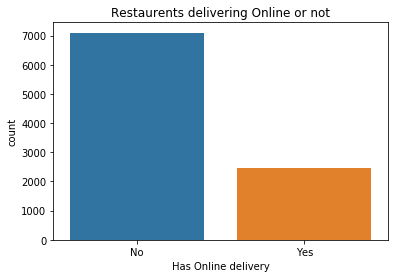

In [21]:
sns.countplot(x='Has Online delivery',data=df)
plt.title("Restaurents delivering Online or not")


## Question 2) Restaurants allowing table boooking or not

Text(0.5, 1.0, 'Restaurents allowing table booking or not')

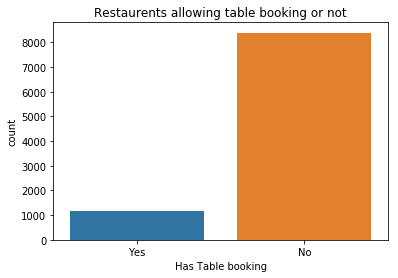

In [36]:
sns.countplot(x='Has Table booking',data=df)
plt.title("Restaurents allowing table booking or not")


## Question 12.) Restaurant type

(-1.105223862472434,
 1.1002487564425774,
 -1.1009306389165723,
 1.1093755648355168)

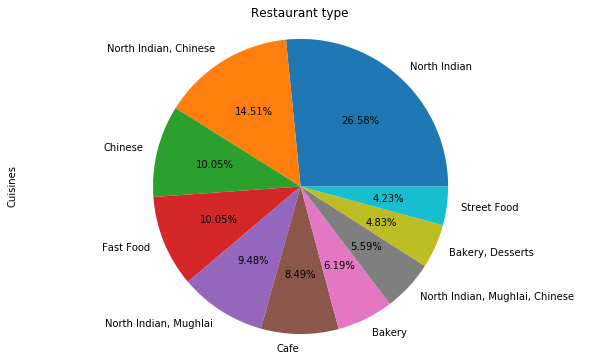

In [23]:
df['Cuisines'].value_counts().sort_values(ascending=False).head(10)
df['Cuisines'].value_counts().sort_values(ascending=False).head(10).plot(kind='pie',figsize=(10,6), 
title="Restaurant type", autopct='%1.2f%%')
plt.axis('equal')

## quest 3.) table booking rate vs rate

Text(0.5, 1.0, 'Table booking rate vs Price range')

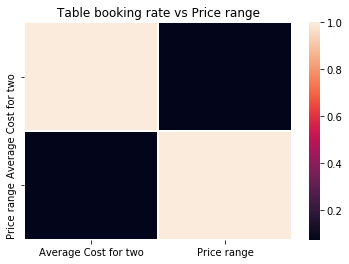

In [37]:
df_corr = df[['Average Cost for two', 'Price range']]
sns.heatmap(df_corr.corr(),linewidth=1.0)
plt.title('Table booking rate vs Price range')

## Question 5) Relation between location and rating 

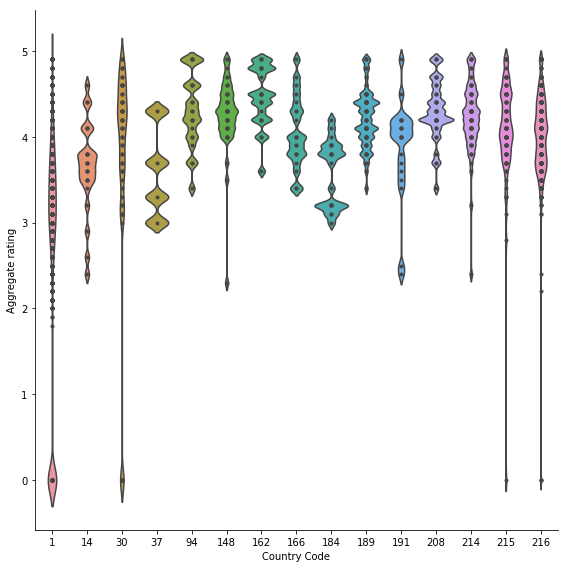

In [50]:
sns.catplot(x='Country Code',y='Aggregate rating',inner="point",scale='area',height=8,data=df,bw=0.1,width=1,kind='violin')

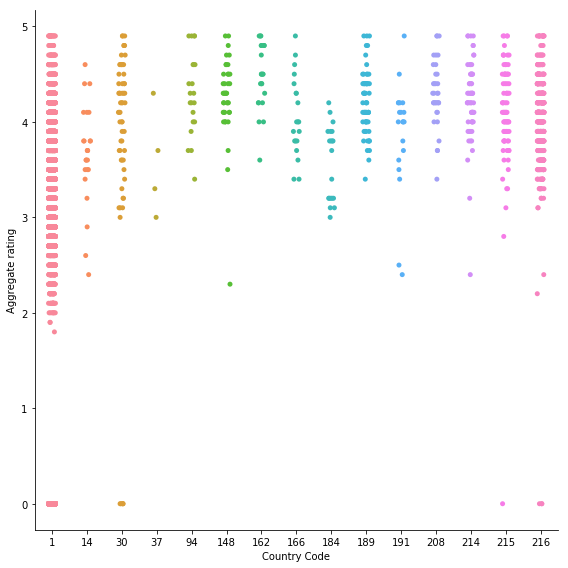

In [23]:
sns.catplot(x='Country Code',y='Aggregate rating',height=8,aspect=1,data=df,kind='strip')

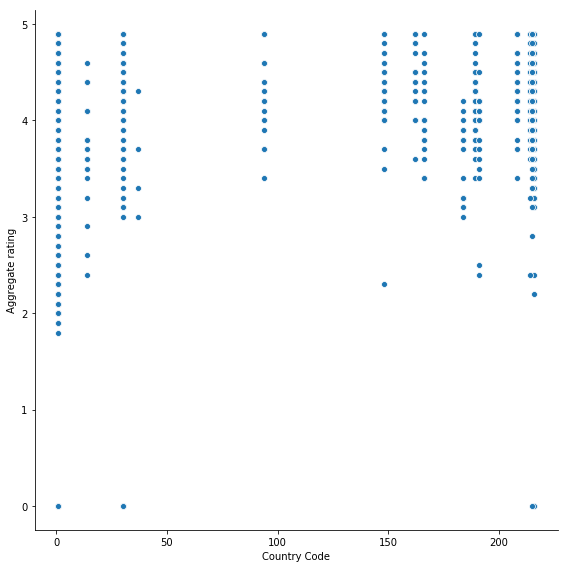

In [5]:
#sns.catplot(x='Country Code',y='Aggregate rating',inner="point",scale='area',height=8,data=df,bw=0.1,width=1,kind='violin')
sns.relplot(x='Country Code',y='Aggregate rating',height=8,aspect=1,data=df)


## 4. ) Best Location

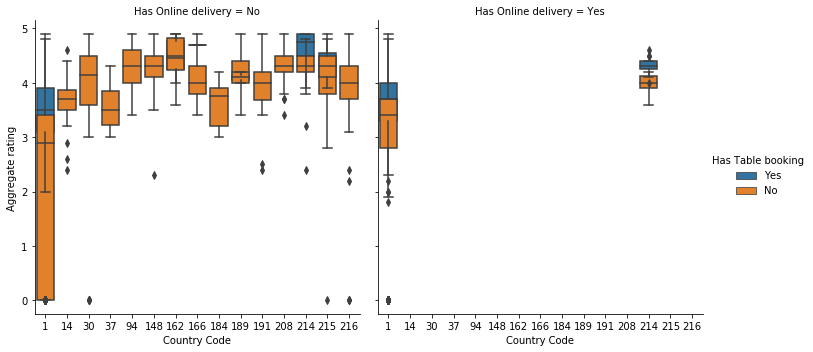

In [68]:
sns.catplot(x='Country Code',y='Aggregate rating',hue='Has Table booking',col='Has Online delivery',dodge=False,data=df,kind='box')

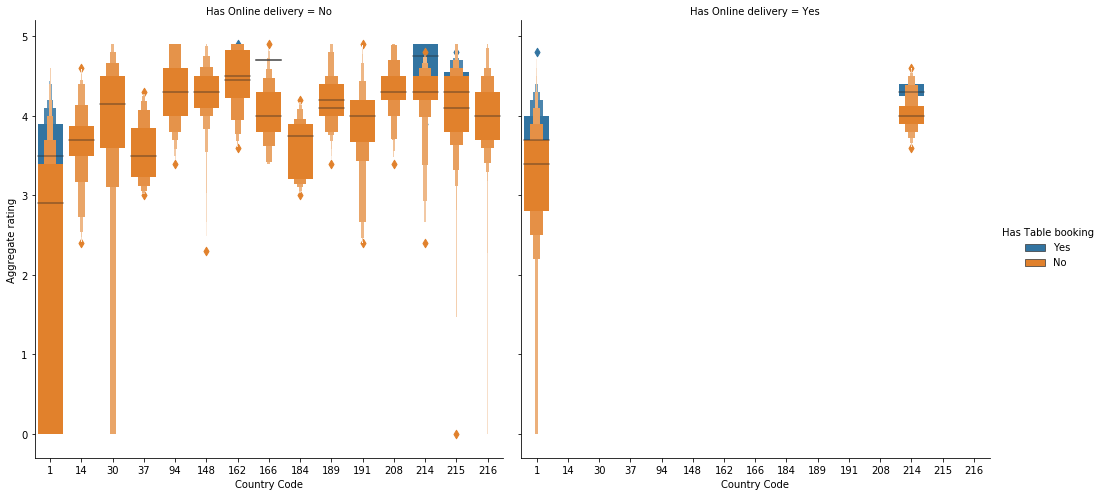

In [78]:
sns.catplot(x='Country Code',y='Aggregate rating',hue='Has Table booking',col='Has Online delivery',height=7,dodge=False,data=df,kind='boxen')

## Question 11) No of restaurants in location

In [24]:
df_new=df.groupby('Country Code').sum()

In [25]:
df_new.head(1)

,Restaurant ID,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,Count
Country Code,,,,,,,,
1,74901100808,630356.91484,228591.481428,5393400,14896,21831.8,1187163,8652


## Question 8) Types of services

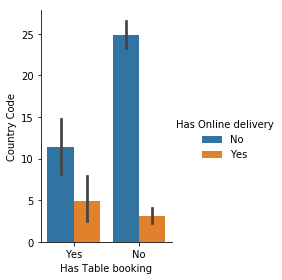

In [28]:
g = sns.catplot(y="Country Code", 
                hue="Has Online delivery", x="Has Table booking",
                data=df, kind="bar",
                height=4, aspect=.7);